# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline

import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
import seaborn as sn

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

### Airline Data Set
The data set we've chosen to use an index of domestic Indian airline flights that took place in 2019. The primary purpose of the dataset is to track the fluctation of the price of airfare and intened to be used to predict the price of an airline ticket given specific data about the the flight

### Diesel Data Set
This data set contains the gas rate (price per gallon) everyday from 1/2/2019 to 12/31/2019 in every major city in each state in India. We intend on using this dataset to see whether or not the fluctuating diesel prices of India have an influence on the prices of airfare. We note that airplanes don't use diesel, however for our purposes we are experiementing to see if the prices of diesel will be a good enough representation of fuel prices as whole.

## Holiday Data Set
This data set contains every holiday celebrated in India in 2019. One of the most notable features of it is that it contains whether or not the holiday is concidered "Restricted" or "Gazetted" by the Indian government. Restricted means that a holiday isn't recognized by the government as an offical holiday, where if a holiday is gazetted, it means the government has mandated that holiday.


**NOTE** For all datasets, the prices are in rupees (or INR). 
For context **1 INR = 0.013 USD**  and  **1 USD = 76.49 INR**

### Exploration Questions

- Do diesel prices have a meaningful affect on airline prices, and if so, to what degree?
- How much do upcoming/recent holidays affect airline prices?
- Do restricted holidays affect airline prices more than gazetted holidays?
- 

### Read and Clean Datasets 

In [26]:
airfare = pd.read_csv('airfareTrain.csv')
holidays = pd.read_csv('holidays2019.csv')
dieselPrices = pd.read_csv('diesel.csv')

#Standardiszing Attribute Names
airfare.rename(columns={'Airline':'airline',
                            'Date_of_Journey':'date',
                            'Source':'starting_city',
                            'Destination':'destination',
                            'Route':'route',
                            'Dep_Time':'depart_time',
                            'Arrival_Time':'arrival_time',
                            'Duration':'duration',
                            'Total_Stops':'total_stops',
                            'Additional Info':'misc',
                            'Price':'price'},inplace=True)


airfare = airfare.drop(['route', 'arrival_time','misc'], axis=1)

airfare['total_stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops', '5 stops'], [0, 1, 2, 3, 4, 5], inplace=True)

#Typecasting Attributes
    #AirFare
airfare['date']     = pd.to_datetime(airfare.date)
airfare['duration'] = pd.to_timedelta(airfare.duration).astype('timedelta64[m]')
airfare['duration'] = pd.to_numeric(airfare.duration)
airfare['price']    = pd.to_numeric(airfare.price)
airfare['depart_time'] = pd.to_datetime(airfare.depart_time)

airfare['airline'] = airfare.airline.astype('category')
airfare['starting_city'] = airfare.starting_city.astype('category')
airfare['destination'] = airfare.destination.astype('category')


    #Diesel
dieselPrices['date'] =  pd.to_datetime(dieselPrices.date)
    
    #Holidays
holidays = holidays.drop(['day'], axis=1)	
holidays['date']    = pd.to_datetime(holidays.date)
holidays['holiday_type'].replace(['Restricted','Gazetted'], [0, 1], inplace=True)


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### What type of data is each variable?

In [27]:
print("=Airfare Types=\n",airfare.dtypes,"\n")
print("=Diesel Types=\n",dieselPrices.dtypes,"\n")
print("=Holiday Types=\n",holidays.dtypes)

=Airfare Types=
 airline                category
date             datetime64[ns]
starting_city          category
destination            category
depart_time      datetime64[ns]
duration                float64
total_stops             float64
price                     int64
dtype: object 

=Diesel Types=
 city             object
date     datetime64[ns]
rate            float64
state            object
dtype: object 

=Holiday Types=
 date            datetime64[ns]
holiday                 object
holiday_type             int64
dtype: object


### What is the total size of the data sets?

In [28]:
print("Shape of Airfare:  ", airfare.shape, '\t\tTotal Size: ', airfare.size)
print("Shape of Diesel Prices: ",dieselPrices.shape, '\tTotal Size: ', dieselPrices.size)
print("Shape of Holidays: ",holidays.shape, '\t\tTotal Size: ', holidays.size)

Shape of Airfare:   (10683, 8) 		Total Size:  85464
Shape of Diesel Prices:  (4104, 4) 	Total Size:  16416
Shape of Holidays:  (46, 3) 		Total Size:  138


### What time boundaries are there in the dataset?  IOW, what time frame do they span?

In [29]:
print("Airfare start date: ",airfare['date'].min())
print("Airfare end date:   ",airfare['date'].max(),'\n')
print(pd.date_range(start=airfare['date'].min(), end=airfare['date'].max()))

print("\nDiesel start date: ",dieselPrices['date'].min())
print("Diesel end date:   ",dieselPrices['date'].max(),'\n')
print(pd.date_range(start=dieselPrices['date'].min(), end=dieselPrices['date'].max()))

print("\nHoliday start date: ",holidays['date'].min())
print("Holiday end date:   ",holidays['date'].max(),'\n')
print(pd.date_range(start=holidays['date'].min(), end=holidays['date'].max()))

Airfare start date:  2019-01-03 00:00:00
Airfare end date:    2019-12-06 00:00:00 

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12',
               ...
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06'],
              dtype='datetime64[ns]', length=338, freq='D')

Diesel start date:  2019-01-02 00:00:00
Diesel end date:    2019-12-31 00:00:00 

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12

### Are there any missing values in any of the variables? 

In [30]:
print("=Airline Values=\n")

print(
    "airline:\t\t",           airfare.airline.isnull().values.any(),
    "\ndate:\t\t\t",          airfare.date.isnull().values.any(),
    "\nstarting_city:\t\t",   airfare.starting_city.isnull().values.any(),
    "\ndestination:\t\t",     airfare.destination.isnull().values.any(),
    "\nduration:\t\t",        airfare.duration.isnull().values.any(),
    "\ntotal_stops:\t\t",     airfare.total_stops.isnull().values.any(), airfare.total_stops.isnull().values.sum()
    

)

print("\n=Diesel Values=\n")
print(
    "city:\t\t\t",            dieselPrices.city.isnull().values.any(),
    "\ndate:\t\t\t",          dieselPrices.date.isnull().values.any(),
    "\nrate:\t\t\t",          dieselPrices.rate.isnull().values.any(),
    "\nstate:\t\t\t",         dieselPrices.state.isnull().values.any(),
)
print("\n=Holday Values=\n")
print(
    "date:\t\t\t",            holidays.date.isnull().values.any(),
    "\nholiday:\t\t",       holidays.holiday.isnull().values.any(),
    "\nholiday_type:\t\t",  holidays.holiday_type.isnull().values.any()

)

=Airline Values=

airline:		 False 
date:			 False 
starting_city:		 False 
destination:		 False 
duration:		 False 
total_stops:		 True 1

=Diesel Values=

city:			 False 
date:			 False 
rate:			 False 
state:			 False

=Holday Values=

date:			 False 
holiday:		 False 
holiday_type:		 False


#### We noticed that there is one value of total_stops that is N/A
 Through running the code below we were able to find it which exact index was missing, in our case it was one empty cell, then fill it with an assumed zero

In [34]:
print("Index of N/A value:",airfare['total_stops'].index[airfare['total_stops'].apply(np.isnan)].get_value)
airfare["total_stops"] = airfare["total_stops"].fillna(0)
print("total_stops:\t",     airfare.total_stops.isnull().values.any())

Index of N/A value: <bound method Index.get_value of Int64Index([], dtype='int64')>
total_stops:	 False


### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

## Airline Fare Data Dictionarty

- airline        : Name of airline carrier (Air India, IndiGo, Multiple Carriers, etc.)           
- starting_city  : Starting city (Delhi, Kolkata, Banglore, etc)                         
- destination    : Destination city (Delhi, Kolkata, Banglore, etc.)               
- date           : Data         
- duration       : Total duration of the flight in minutes
- total_stops    : Total amount of layovers in the route
- pirce          : Price of the flight in rupees


In [123]:
airfare.dtypes

airline                category
date             datetime64[ns]
starting_city          category
destination            category
depart_time      datetime64[ns]
duration                float64
total_stops             float64
price                     int64
dtype: object

In [124]:
print('=Airline values=\n',airfare['airline'].cat.categories.tolist())
print('\n=starting_city values=\n',airfare['starting_city'].cat.categories.tolist())
print('\n=destination values=\n',airfare['destination'].cat.categories.tolist())

=Airline values=
 ['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy']

=starting_city values=
 ['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']

=destination values=
 ['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']


In [125]:
print("=Date=\nmin: ", airfare['date'].min() ,'\nmax:', airfare['date'].max(), '\nmedian: ', airfare['date'].median())
print("\n=Duration=\nmin: ", airfare['duration'].min() ,'\nmax:', airfare['duration'].max(), '\nmedian: ', airfare['duration'].median())
print("\n=Price=\nmin: ", airfare['price'].min() ,'\nmax:', airfare['price'].max(), '\nmedian: ', airfare['price'].median())

=Date=
min:  2019-01-03 00:00:00 
max: 2019-12-06 00:00:00 
median:  2019-05-24 00:00:00

=Duration=
min:  5.0 
max: 2860.0 
median:  520.0

=Price=
min:  1760 
max: 79513 
median:  8373.0


<AxesSubplot:>

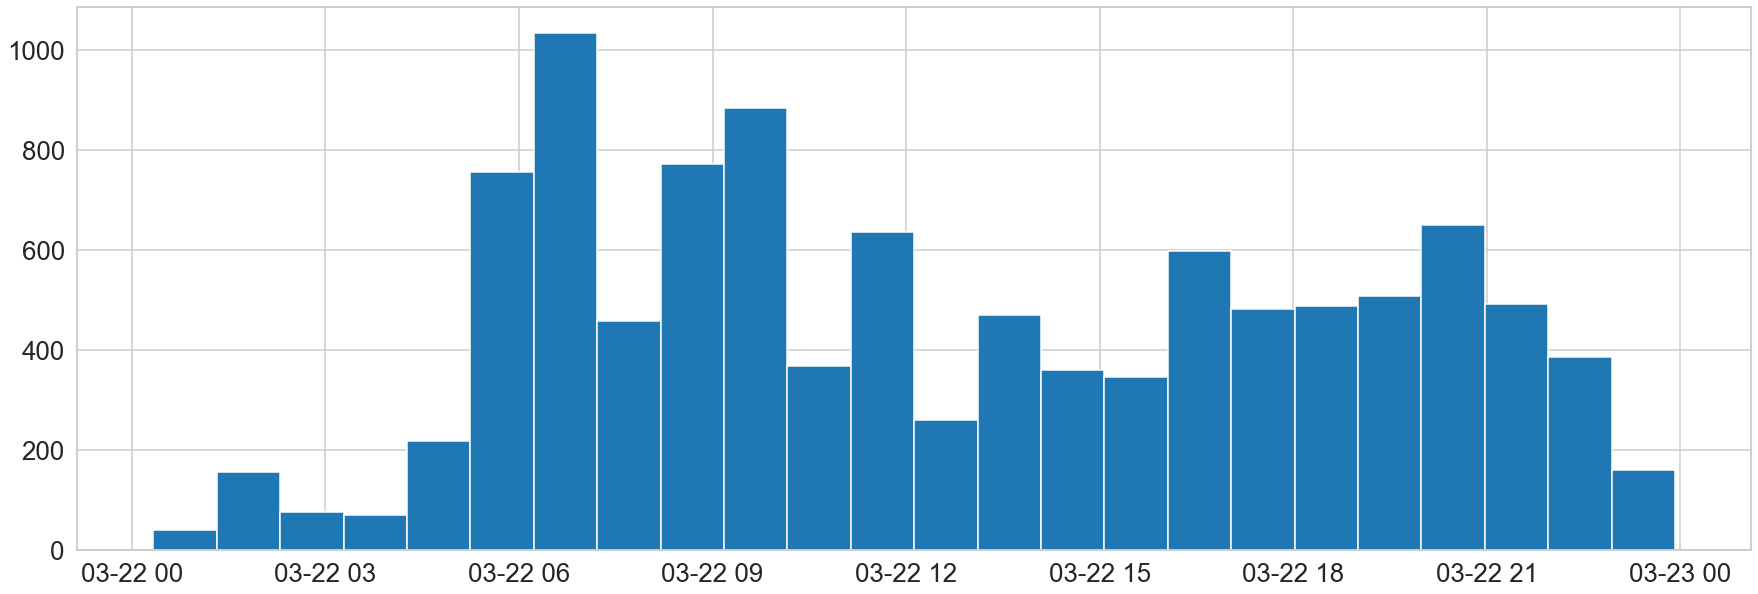

In [126]:
airfare['depart_time'].hist(bins=24)

<AxesSubplot:>

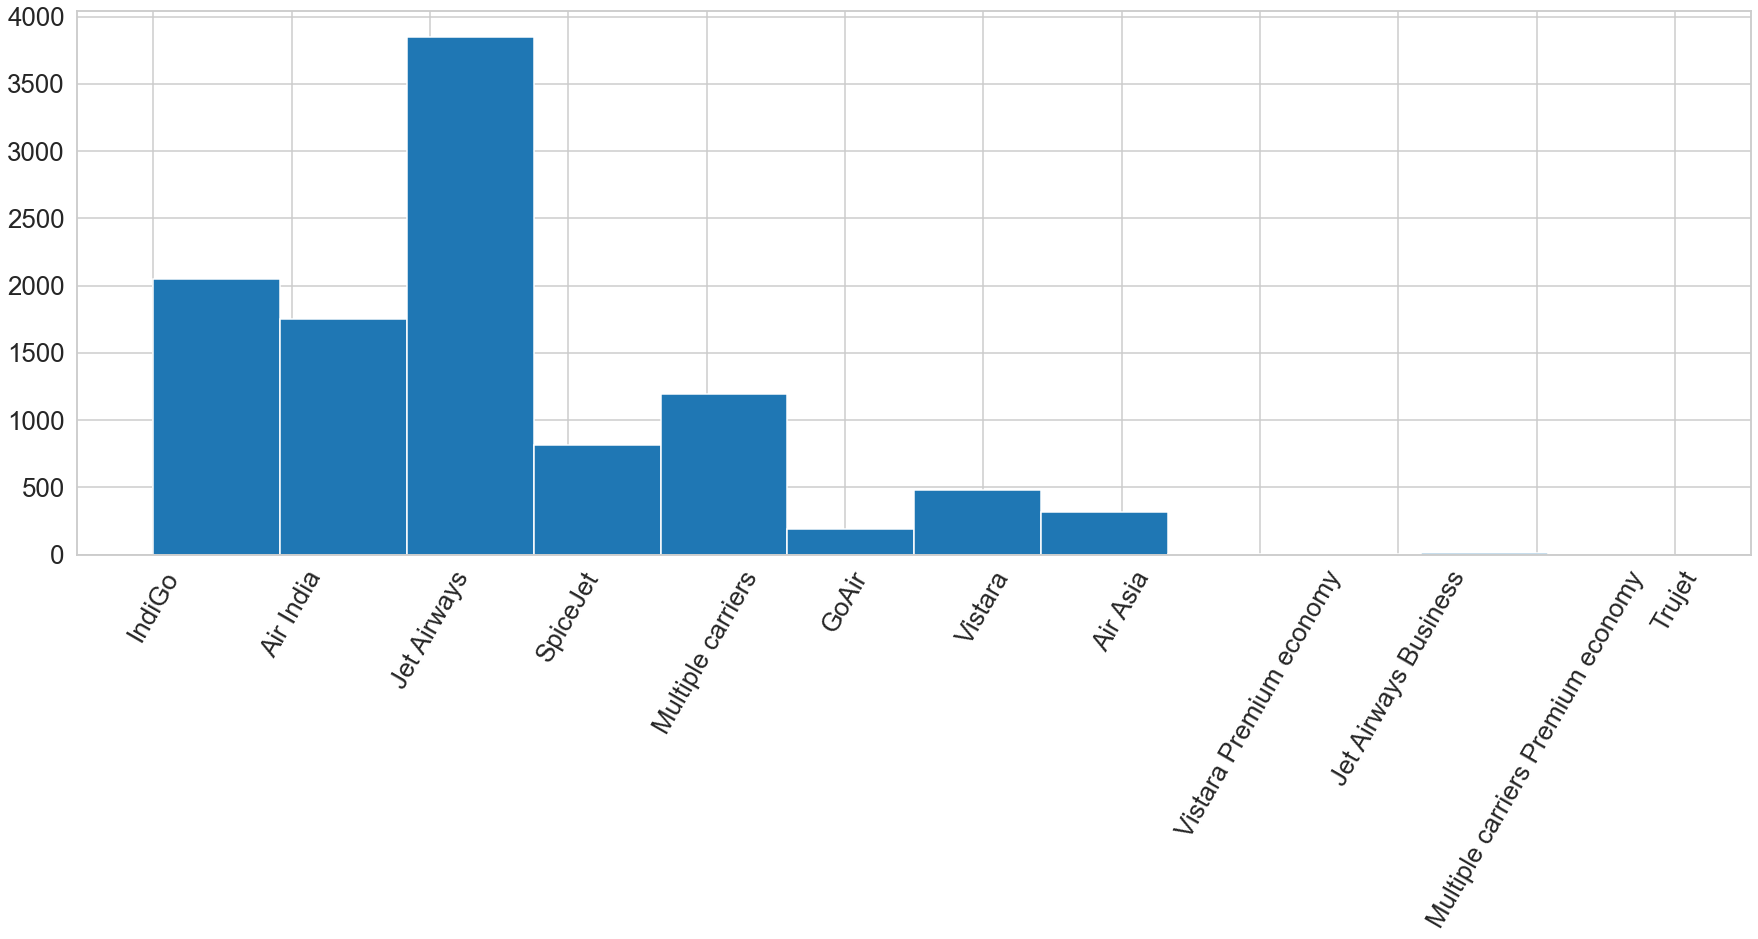

In [135]:
plt.xticks(rotation=60)

airfare['airline'].hist(bins=12)

<AxesSubplot:xlabel='month', ylabel='Count'>

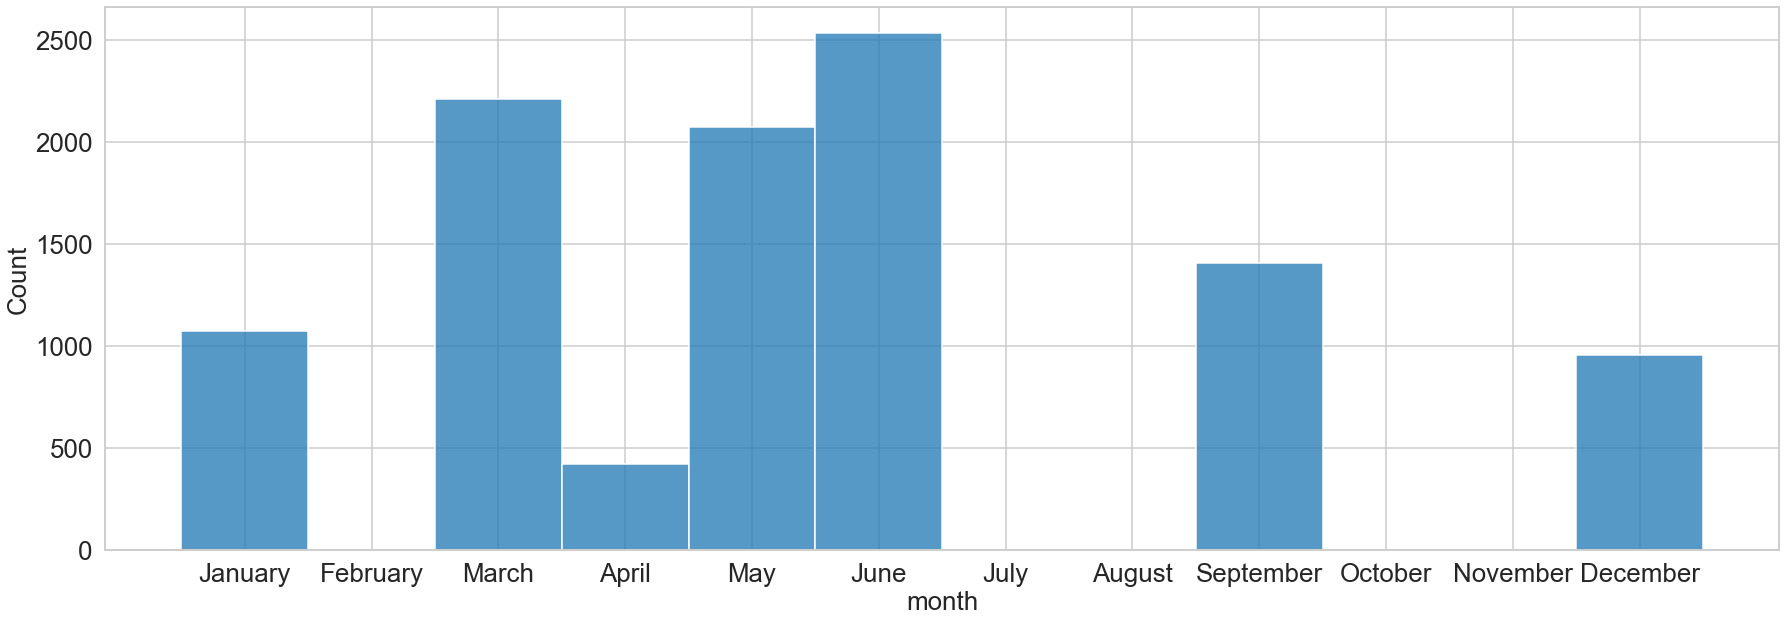

In [145]:
airfare['month'] = airfare['date'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
airfare['month'] = pd.Categorical(airfare['month'], categories=months, ordered=True)
sn.histplot(x=airfare['month'])

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

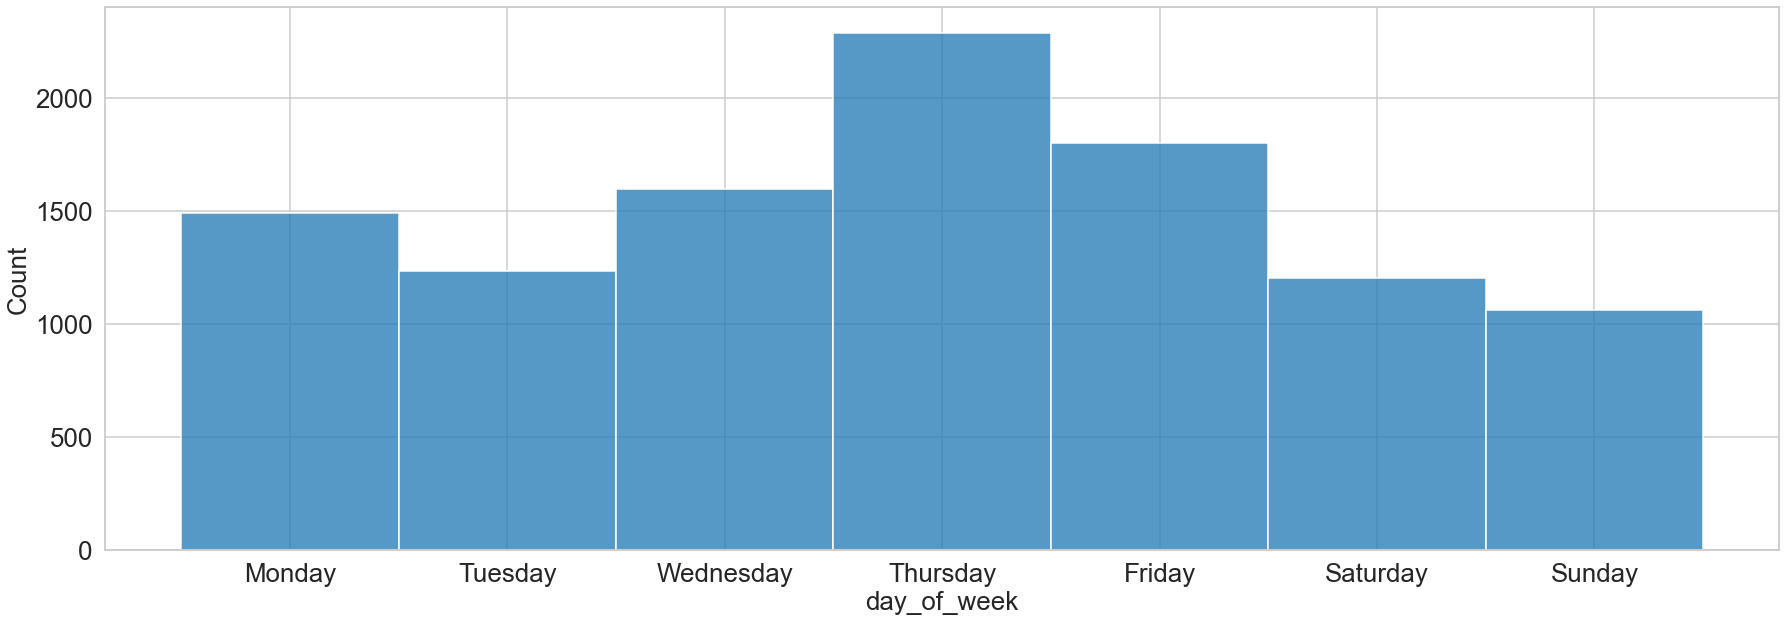

In [144]:
airfare['day_of_week'] = airfare['date'].dt.day_name()
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
airfare['day_of_week'] = pd.Categorical(airfare['day_of_week'], categories=days, ordered=True)
sn.histplot(x=airfare['day_of_week'])

<AxesSubplot:>

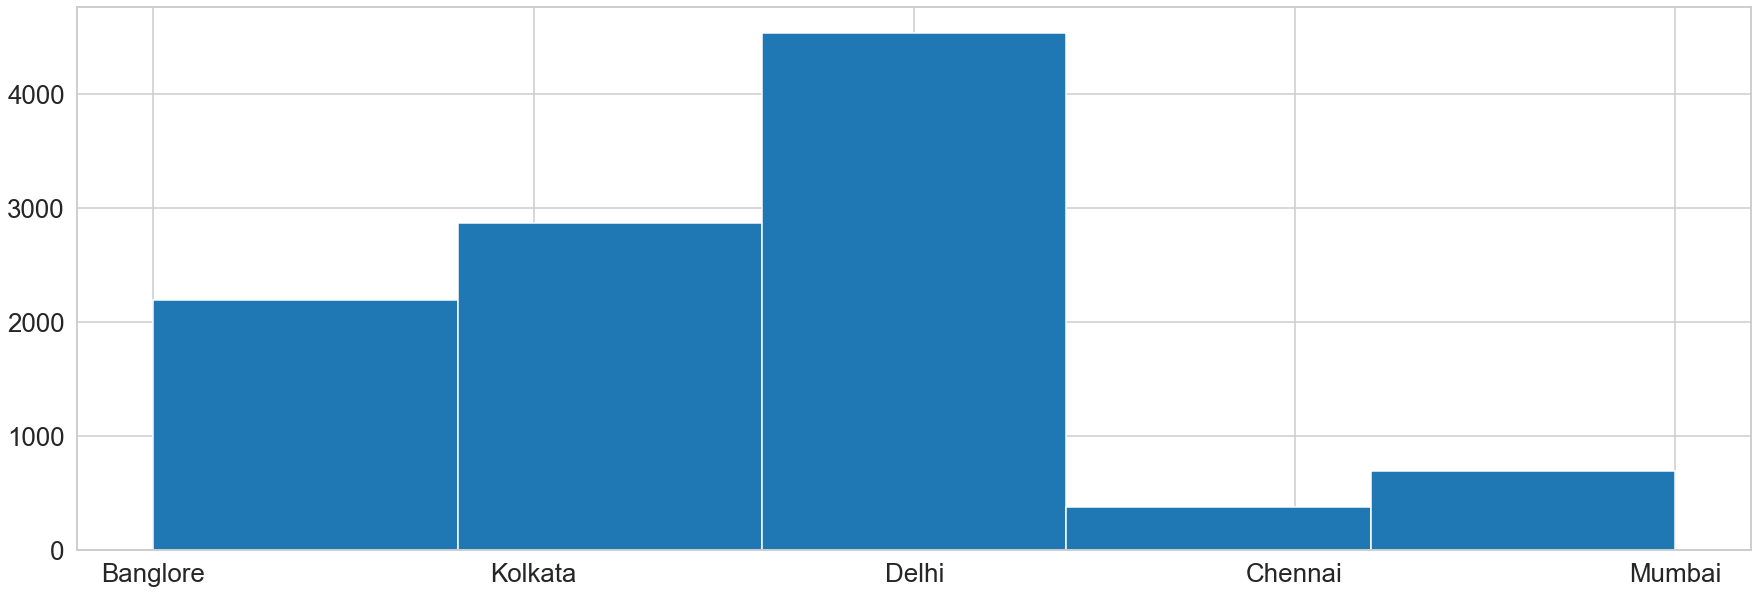

In [148]:
airfare['starting_city'].hist(bins=5)

<AxesSubplot:>

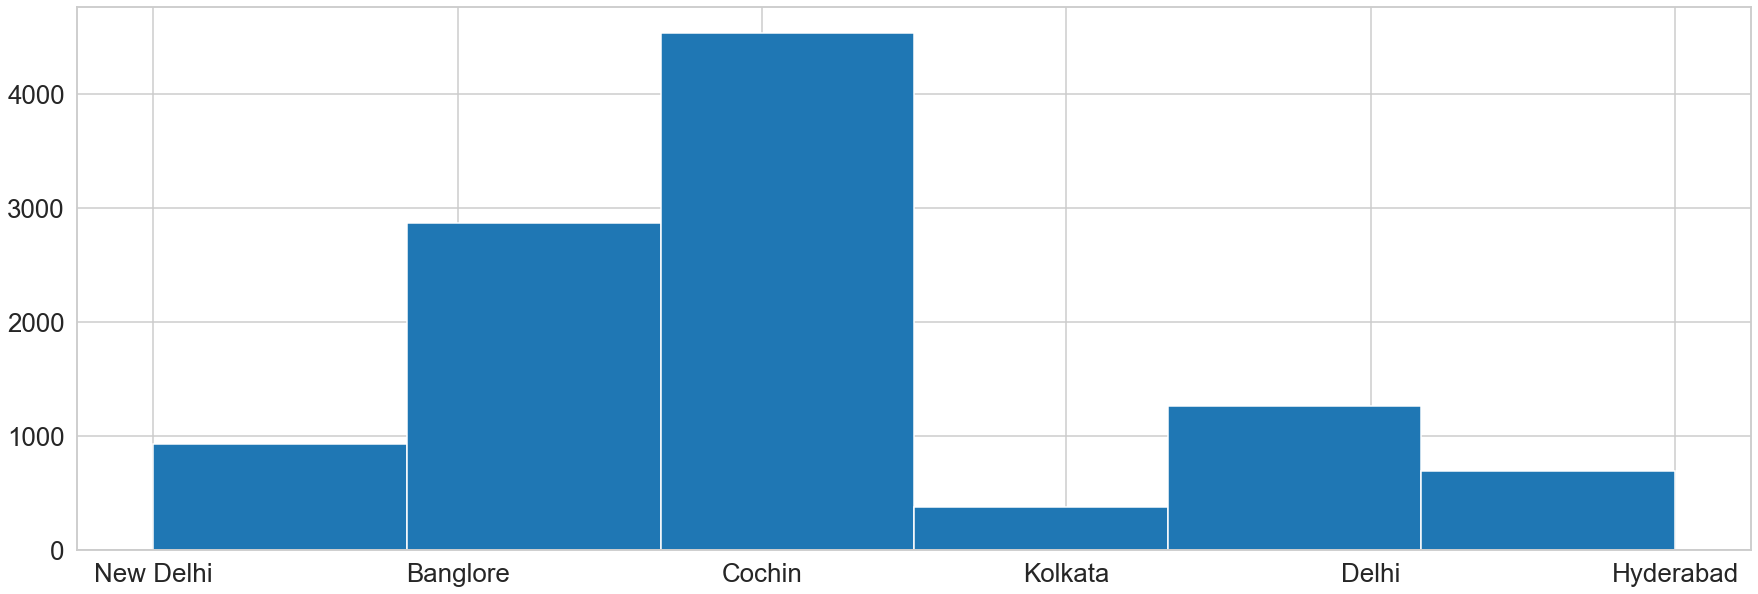

In [149]:
airfare['destination'].hist(bins=6)

<AxesSubplot:>

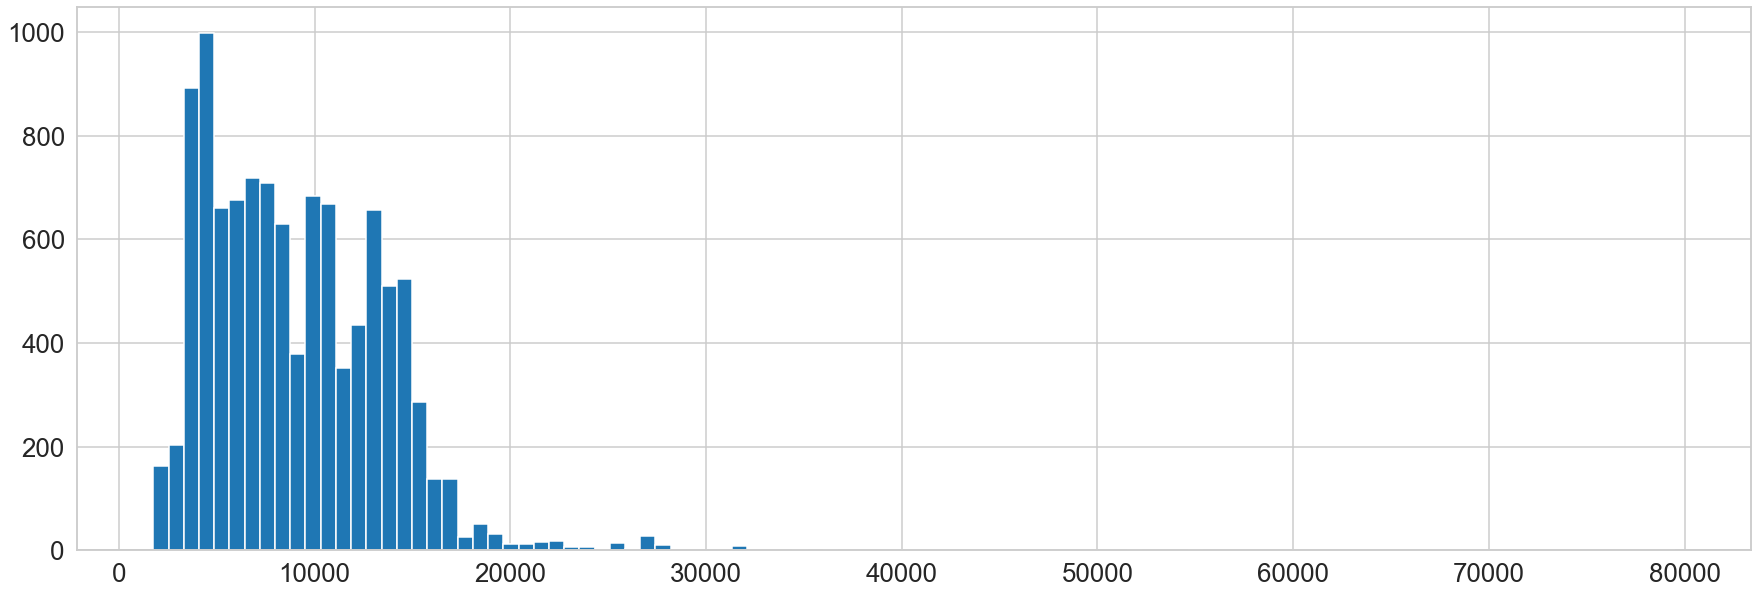

In [157]:
airfare['price'].hist(bins=100)

<AxesSubplot:>

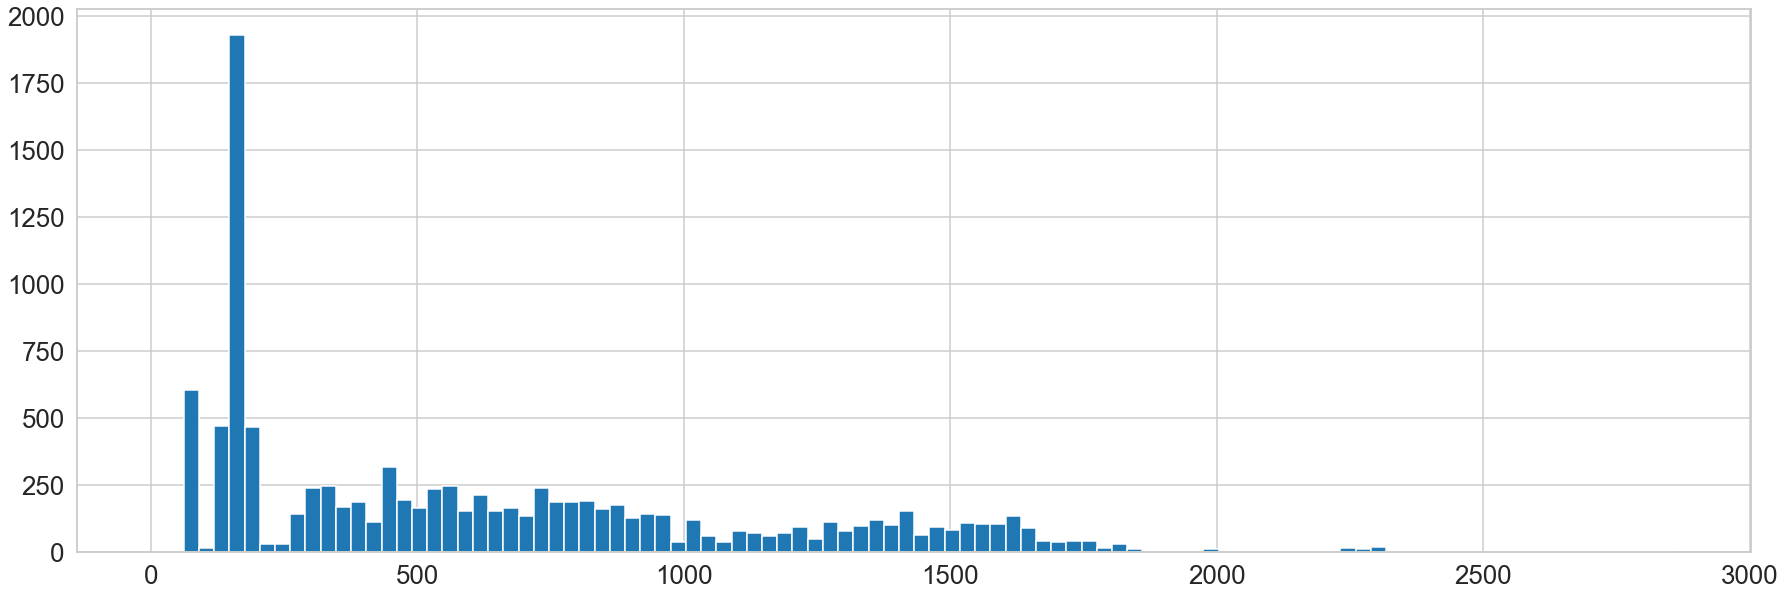

In [158]:
airfare['duration'].hist(bins=100)

## Holiday Data Dictionarty

- date           : date of holiday
- holiday        : name of the holiday
- holiday_type   : Whether or not it is concidered "Restricted" or "Gazetted"
                   0 = Restricted (Not Nationally Recognized)
                   1 = Gazetted   (Nationally Recognized)
                   

In [161]:
holidays.dtypes

date            datetime64[ns]
holiday                 object
holiday_type             int64
dtype: object

In [163]:
print("=Date=\nmin: ", holidays['date'].min() ,'\nmax:', holidays['date'].max(), '\nmedian: ', holidays['date'].median())

=Date=
min:  2019-01-01 00:00:00 
max: 2019-12-25 00:00:00 
median:  2019-07-23 12:00:00


In [164]:
holidays['month'] = holidays['date'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
holidays['month'] = pd.Categorical(holidays['month'], categories=months, ordered=True)
sn.histplot(x=holidays['month'])

In [ ]:
holidays['day_of_week'] = holidays['date'].dt.day_name()
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
holidays['day_of_week'] = pd.Categorical(holidays['day_of_week'], categories=days, ordered=True)
sn.histplot(x=holidays['day_of_week'])

<AxesSubplot:>

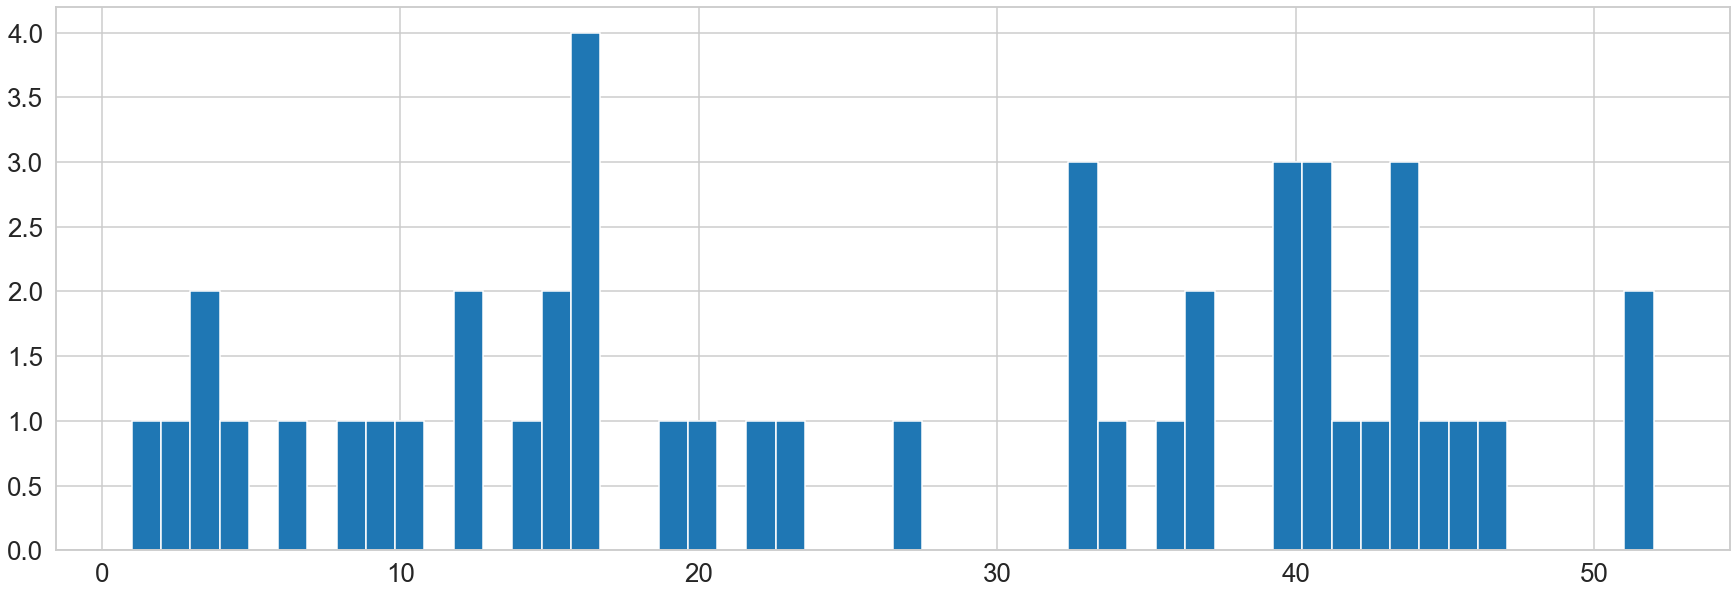

In [171]:
holidays['week_of_year'] = holidays['date'].dt.isocalendar().week
holidays['week_of_year'].hist(bins=52)

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

<AxesSubplot:xlabel='duration', ylabel='price'>

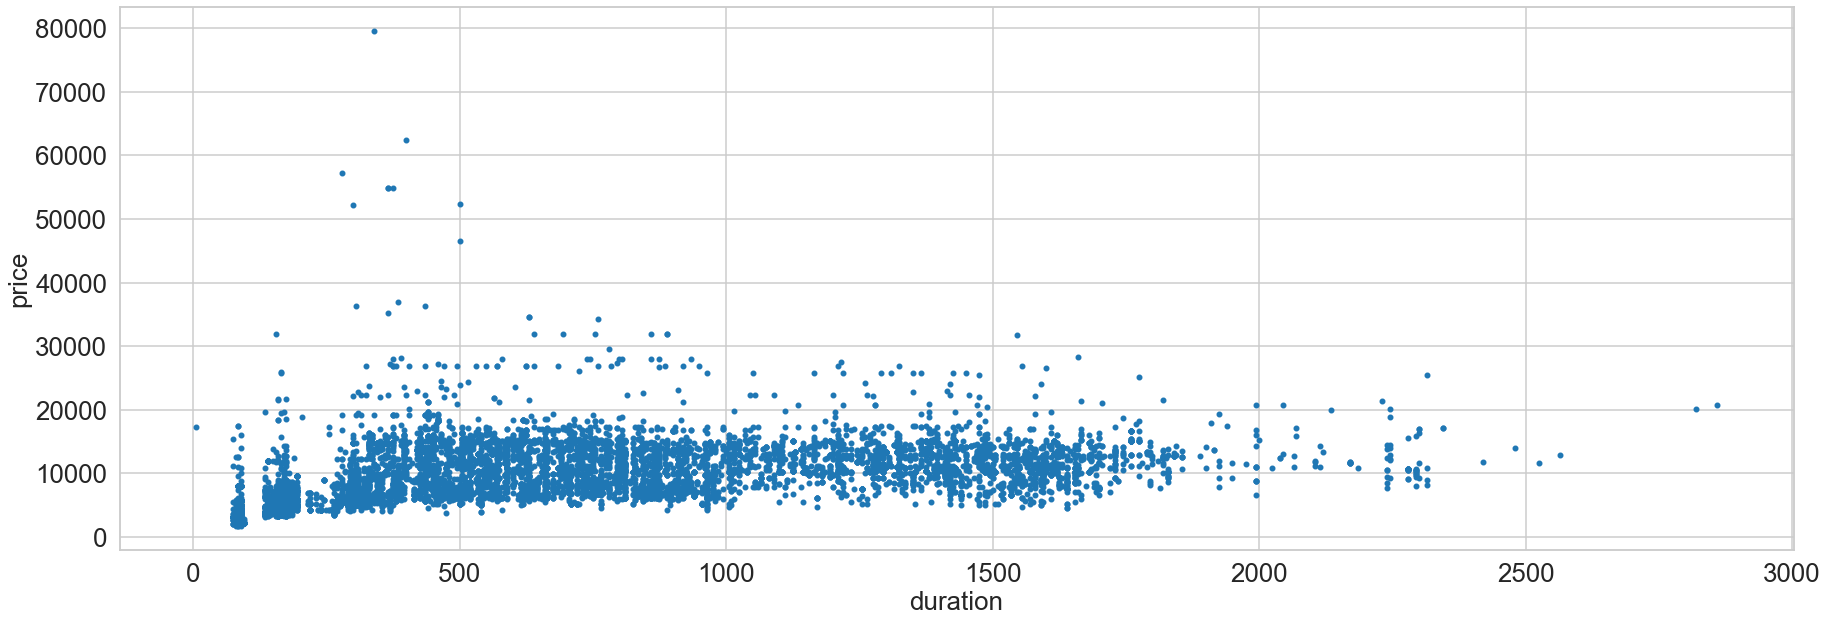

In [128]:
airfare.plot.scatter(x='duration', y='price')